## ANN Regressor - Theo Chambers

## Description of Data:
This notebook contains an ANN Regressor on a red wine quality data set pulled from the UCI Machine Learning Repository. The full data set contains 12 columns, with 1,599 rows. The variables include the following: <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10)


## Objective.
My objective is to predict the quality of wine (on a score of 1 to 10), based on the 11 input variables as independent variables. Here, I fit an ANN regressor using keras to determine the best model for the predictor variable. I calculated the optimality of my solutions based on the MSE, or the mean squared error as the metric of the error rate. Another objective for the ANN regressor was to minimize the run time. In order to do this, I employed multiple techniques including scaling the data, cross validation, and experimentation. I found that only including one hidden layer was appropriate for the data, because of the small sample space and in attempt to avoid overfitting.

## Data Pretreating 

First, I import the necessary modules for the neural network. I also set the seed to backtrack over previous solutions and check which combinations of nodes or epochs give the best MSE.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
np.random.seed(10)

We read in the csv, which is delimited by semicolons, and get rid of the header in the process. We call the .head() method to make sure the data is read in properly.

In [2]:
red_wine = pd.read_csv("winequality-red.csv",delimiter=';',header=0)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking NA's, we can see that the data set is already clean and contains none. Otherwise, we would call the drop method on our pandas dataframe to remove these data points.

In [3]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now, we collect the values of the red_wine pandas dataframe, as we need the data points in matrix form. We can see that the shape of the matrix still retains its original shape, 12 columns with 1599 rows.

In [4]:
red_wine = red_wine.values

In [5]:
red_wine.shape

(1599, 12)

Now, we split up the independent and dependent variables. We select all the data points, but only the columns specified, as the data is already in the appropriate order (with the independent variable in the last column position). Then, we reshape the dependent variable, quality, into a 2d array so that we may scale it.

In [34]:
ivs = red_wine[:,0:11]
quality = red_wine[:,11]
quality = np.array(quality).reshape((len(quality),1))

Here, we call the minmaxscaler method from sklearn to transform both the dependent and independent variables. This will transform our data into a scaled version of itself, in the range of 0 to 1. When designing neural networks, it is common practice to scale the data, especially when the original data points are very different. Once we transform our data, we use train_test_split to split the data into a train size of 75% of its original size.

In [35]:
ivs = preprocessing.MinMaxScaler().fit_transform(ivs)
quality = preprocessing.MinMaxScaler().fit_transform(quality)

In [36]:
ivs_train, ivs_test, quality_train, quality_test, = train_test_split(ivs,quality,test_size=.25,random_state=20)

## Model Building.
Here we begin building our model. I first initialize a simple model with one hidden layer of 12 nodes, to make sure the data is processing correctly. Our mse values begin very small, as all of our input values are between 0 and 1 due to the scaler.

In [9]:
model = Sequential()
model.add(Dense(12,input_dim=11,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='linear'))

In [10]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
start=datetime.datetime.now()

model.fit(ivs_train,quality_train,epochs=25,batch_size=100,verbose=2)
scores = model.evaluate(ivs_test,quality_test,verbose=0)
end=datetime.datetime.now()
print("Run Time:", end-start)

Epoch 1/25
12/12 - 1s - loss: 0.2803 - mse: 0.2803
Epoch 2/25
12/12 - 0s - loss: 0.2272 - mse: 0.2272
Epoch 3/25
12/12 - 0s - loss: 0.1618 - mse: 0.1618
Epoch 4/25
12/12 - 0s - loss: 0.0947 - mse: 0.0947
Epoch 5/25
12/12 - 0s - loss: 0.0519 - mse: 0.0519
Epoch 6/25
12/12 - 0s - loss: 0.0422 - mse: 0.0422
Epoch 7/25
12/12 - 0s - loss: 0.0362 - mse: 0.0362
Epoch 8/25
12/12 - 0s - loss: 0.0323 - mse: 0.0323
Epoch 9/25
12/12 - 0s - loss: 0.0295 - mse: 0.0295
Epoch 10/25
12/12 - 0s - loss: 0.0276 - mse: 0.0276
Epoch 11/25
12/12 - 0s - loss: 0.0260 - mse: 0.0260
Epoch 12/25
12/12 - 0s - loss: 0.0249 - mse: 0.0249
Epoch 13/25
12/12 - 0s - loss: 0.0239 - mse: 0.0239
Epoch 14/25
12/12 - 0s - loss: 0.0233 - mse: 0.0233
Epoch 15/25
12/12 - 0s - loss: 0.0226 - mse: 0.0226
Epoch 16/25
12/12 - 0s - loss: 0.0221 - mse: 0.0221
Epoch 17/25
12/12 - 0s - loss: 0.0216 - mse: 0.0216
Epoch 18/25
12/12 - 0s - loss: 0.0211 - mse: 0.0211
Epoch 19/25
12/12 - 0s - loss: 0.0208 - mse: 0.0208
Epoch 20/25
12/12 - 0

## Experimentation

Now that we are sure our model is learning correctly, I start experimenting with different node values to build the layers. Here, I decided to have the first input nodes begin at 12 and end at 26. The hidden layer (or nodes_2) begins at 2 and ends at 16. The for loops iterate through all possible combinations, fitting the model using the test data as the validation input, and appending the history of validation mse loss to a list called initial_mses. This list will then contain the history of all validation mse loss for each epoch and each combination of layers).

In [11]:
nodes_1 = [i for i in range(12,28,2)]
nodes_2 = [i for i in range(2,18,2)]

start = datetime.datetime.now()

initial_mses = []
for i in (nodes_1):
    for j in (nodes_2):
        model = Sequential()
        model.add(Dense(i,input_dim=11,activation='relu'))
        model.add(Dense(j,activation='relu'))
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])
        estimator = model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=25,verbose=0)
        initial_mses.append(((estimator.history['val_mse']),('layers',i,j)))

We see that the initial_mses was populated correctly, and now contains the history of each layer combination's validation loss mse, along with the epoch as the index number.

In [12]:
initial_mses[0]

([0.05763385817408562,
  0.03200545534491539,
  0.025616668164730072,
  0.021248502656817436,
  0.019388627260923386,
  0.01854696311056614,
  0.018060138449072838,
  0.01753002591431141,
  0.01723857782781124,
  0.016979848966002464,
  0.016711782664060593,
  0.01652897708117962,
  0.01625846140086651,
  0.016281647607684135,
  0.016050564125180244,
  0.01594536378979683,
  0.015936220064759254,
  0.015821168199181557,
  0.015756456181406975,
  0.015713166445493698,
  0.01573733240365982,
  0.015651613473892212,
  0.0156454686075449,
  0.015582564286887646,
  0.01557882409542799],
 ('layers', 12, 2))

I then take the average validation mse from each layer combination, and get the minimum average mse of this list. Pulling out the minimum average mse allows me to select the best node combination for the input layer, and hidden layer.

In [13]:
average_mses = [(np.mean(initial_mses[i][0]),initial_mses[i][1]) for i in range(len(initial_mses))]
optimal_nodes = min(average_mses)

We see that the minimum average mse per layer combination was created by a combination of an input layer with 22 nodes, and a hidden layer with 6 nodes. This MSE is much lower than our initial model, so we are making progress.

In [14]:
optimal_nodes

(0.016726121343672275, ('layers', 22, 6))

Taking the optimal_node layer values from above, I now plot out the estimator history (or the mse decrease along with the epoch increase). I still have not changed the epochs from 25, but I check the total time it takes to run this current minimal solution.

Epoch 1/25
12/12 - 0s - loss: 0.1942 - mse: 0.1942 - val_loss: 0.1296 - val_mse: 0.1296
Epoch 2/25
12/12 - 0s - loss: 0.0895 - mse: 0.0895 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 3/25
12/12 - 0s - loss: 0.0477 - mse: 0.0477 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 4/25
12/12 - 0s - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 5/25
12/12 - 0s - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 6/25
12/12 - 0s - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 7/25
12/12 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 8/25
12/12 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 9/25
12/12 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 10/25
12/12 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 11/25
12/12 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 12/25
12/12 - 0s - loss:

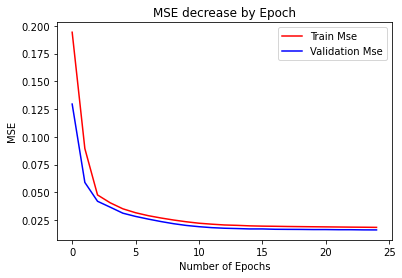

Run Time: 0:00:02.156085


In [19]:
start=datetime.datetime.now()
model = Sequential()
model.add(Dense(optimal_nodes[1][1],input_dim=11,activation='relu'))
model.add(Dense(optimal_nodes[1][2],activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
estimator = model.fit(ivs_train,quality_train,validation_data = (ivs_test,quality_test),epochs=25,batch_size=100,verbose=2)
plt.plot(estimator.history['mse'],color='red',label='Train Mse')
plt.plot(estimator.history['val_mse'],color='blue',label='Validation Mse')
plt.title('MSE decrease by Epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()
end=datetime.datetime.now()
print("Run Time:", end-start)

We see that the model learns very quickly, which is a good sign. Additionally, we see that the train MSE and validation MSE both decrease along with the number of epochs, and both end around .0162, which is a very low MSE. We can now go into validation to select the most optimal pair of epochs, and ensure that we are not overfitting our current optimal combination of layer nodes.

## Validation

First, I define my current optimal_model, taking the node combinations from the previous optimal_node tuple, and returning the new_model. We will see this later when I use cross validation to check for overfitting.

In [16]:
def optimal_model():
    new_model = Sequential()
    new_model.add(Dense(optimal_nodes[1][1],input_dim=11,activation='relu'))
    new_model.add(Dense(optimal_nodes[1][2],activation='relu'))
    new_model.add(Dense(1,activation='linear'))
    new_model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
    
    return new_model

Here I use K-Fold cross validation to check my optimal model. This technique ensures that we can gauge the quality of the neural network. In this case, I randomly separate the available data into equal sized sets (determined by a k constant). This k fold validation will derive 10 subsets of the data, and will be used once as the test set while the rest is used as the training set. Because in our original train/test split, we randomly subset the data, this method of validation ensures that we are not missing other data points. In short, it will allow the user to be confident about their model. I thus iterate over the number of folds, and divide the data to compare the x_train,x_test, with the test subsets. Sklearn's module, KFold, provides the raindom train/test indices to split into these datasets.

5/5 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.1002
Model Evaluation: [0.015749985352158546, 0.015749985352158546, 0.10015785694122314]


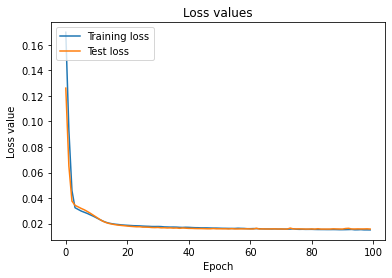

5/5 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190 - mae: 0.1051
Model Evaluation: [0.018976766616106033, 0.018976766616106033, 0.1050785556435585]


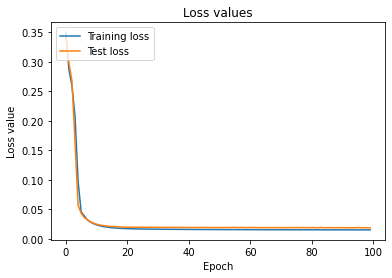

5/5 [==============================] - 0s 3ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.1000
Model Evaluation: [0.01563723012804985, 0.01563723012804985, 0.10004706680774689]


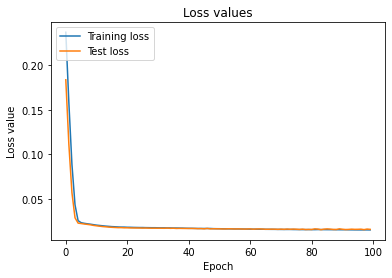

5/5 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.1043
Model Evaluation: [0.01829323172569275, 0.01829323172569275, 0.10430256277322769]


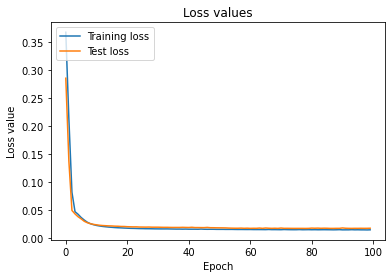

5/5 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0958
Model Evaluation: [0.014624151401221752, 0.014624151401221752, 0.09575017541646957]


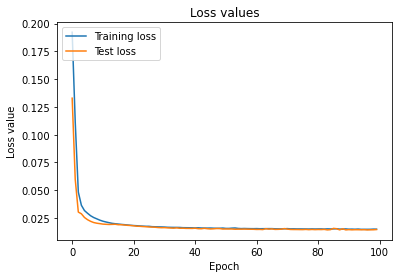

5/5 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0946
Model Evaluation: [0.013768102042376995, 0.013768102042376995, 0.09461584687232971]


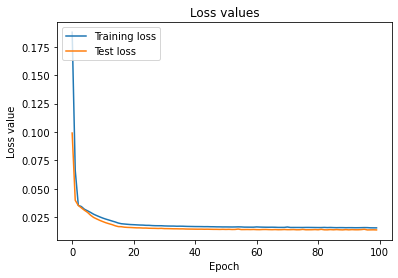

5/5 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0929
Model Evaluation: [0.016392698511481285, 0.016392698511481285, 0.09294916689395905]


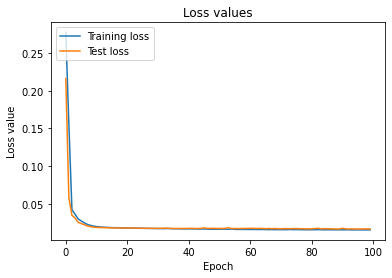

5/5 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.1007
Model Evaluation: [0.016411541029810905, 0.016411541029810905, 0.10067705065011978]


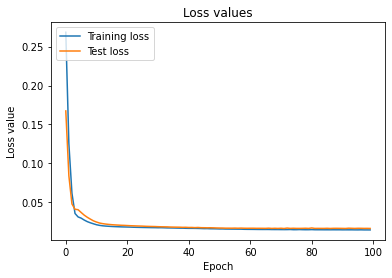

5/5 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0952
Model Evaluation: [0.015413925051689148, 0.015413925051689148, 0.09516177326440811]


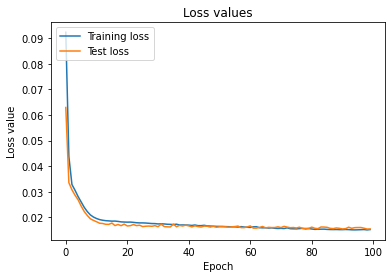

5/5 [==============================] - 0s 3ms/step - loss: 0.0175 - mse: 0.0175 - mae: 0.0986
Model Evaluation: [0.017494993284344673, 0.017494993284344673, 0.09863244742155075]


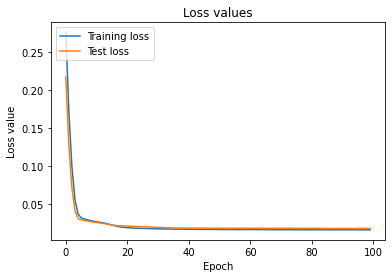

In [17]:
start_time = datetime.datetime.now()
train_loss_totals =[]
validation_loss_totals=[]
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=quality[train_index], quality[test_index]
    model=optimal_model()
    history=model.fit(x_train, y_train, batch_size=100, epochs=100, verbose=0, validation_data=(x_test, y_test))
    print('Model Evaluation:', model.evaluate(x_test, y_test))
    train_loss_totals.append(history.history['mse'])
    validation_loss_totals.append(history.history['val_mse'])
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Test loss')
    plt.title('Loss values from CV')
    plt.ylabel('Loss value')
    plt.xlabel('Epoch')
    plt.legend(loc="upper right")
    plt.show()
stop_time = datetime.datetime.now()
print('Run-Time:',end-start)

The output of the cross validation shows 10 graphs, one for each fold, that contains the model evaluation, along with the validation loss metric (mse), and the train mse. Our lowest mse comes from a K value of 5, with a corresponding loss of .138! This is very low, and potentially may be overfitting. However, because the other graphs do not demonstrate the exact same behavior, this suggests that my original model is not overfitting entirely, which is good for predictions on the test set. Additionally, it is clear that the MSE drastically improves from 0-20 epochs, but then slows down dramatically after this.

Now, I plot out the mean values per epoch to have a different view of the cross validation data. In short, the code below takes the overall mean mse of the train losses, by computing the average per each epoch. So, mean_mse_train is a list containing the average of each epoch for all mse values. This will allow us to demonstrate the overall losses on a single graph.

In [20]:
mean_mse_train = [np.mean([x[i] for x in train_loss_totals]) for i in range(100)]
mean_mse_validation = [np.mean([x[i] for x in validation_loss_totals]) for i in range(100)]

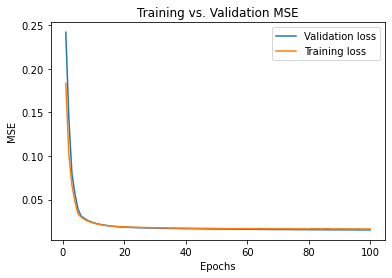

In [21]:
plt.plot(range (1, len(mean_mse_train) + 1), mean_mse_train, label='Validation loss')
plt.plot(range (1, len(mean_mse_validation) + 1), mean_mse_validation, label='Training loss')
plt.title("Training vs. Validation MSE")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

Unsurprisingly, we find that the validation loss and training loss on average mimic the same behavior. This indicates that the ANN regressor could be overfitting slightly, but the MSE values are still very good on the test set. I now decide to take this into consideration, and continue experimenting on different epoch levels to see if the behavior differs between larger epochs. We change the epochs on the cross validation method to find the optimal level for the final model.

In [23]:
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=quality[train_index], quality[test_index]
    model=optimal_model()
    start=datetime.datetime.now()
    model.fit(x_train, y_train, batch_size=100, epochs=300, verbose=2, validation_data=(x_test, y_test))
    scores = model.evaluate(ivs_test,quality_test,verbose=0)
    print(model.metrics_names[0], scores[0])
    print(model.metrics_names[2], scores[2])
    end=datetime.datetime.now()
    print("Run Time:", end-start)

Epoch 1/300
15/15 - 0s - loss: 0.1264 - mse: 0.1264 - mae: 0.3226 - val_loss: 0.0536 - val_mse: 0.0536 - val_mae: 0.1962
Epoch 2/300
15/15 - 0s - loss: 0.0333 - mse: 0.0333 - mae: 0.1460 - val_loss: 0.0212 - val_mse: 0.0212 - val_mae: 0.1109
Epoch 3/300
15/15 - 0s - loss: 0.0247 - mse: 0.0247 - mae: 0.1216 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1114
Epoch 4/300
15/15 - 0s - loss: 0.0220 - mse: 0.0220 - mae: 0.1143 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1056
Epoch 5/300
15/15 - 0s - loss: 0.0216 - mse: 0.0216 - mae: 0.1131 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1044
Epoch 6/300
15/15 - 0s - loss: 0.0210 - mse: 0.0210 - mae: 0.1117 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1041
Epoch 7/300
15/15 - 0s - loss: 0.0207 - mse: 0.0207 - mae: 0.1110 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1032
Epoch 8/300
15/15 - 0s - loss: 0.0204 - mse: 0.0204 - mae: 0.1102 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.1027
Epoch 9/300
15/15 - 0s - loss: 0

Epoch 69/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0966 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0963
Epoch 70/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0969 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0945
Epoch 71/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0968 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0943
Epoch 72/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0971 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0950
Epoch 73/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0967 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0946
Epoch 74/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0970 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0945
Epoch 75/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0965 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0950
Epoch 76/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0965 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0950
Epoch 77/300
15/15 - 0s 

Epoch 136/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0942 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0929
Epoch 137/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0943 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0935
Epoch 138/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0946 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0936
Epoch 139/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0939 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0935
Epoch 140/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0938 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0934
Epoch 141/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0939 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0956
Epoch 142/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0944 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0934
Epoch 143/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0931
Epoch 144/300
15

Epoch 203/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0925 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0947
Epoch 204/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0928 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0947
Epoch 205/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0929 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0943
Epoch 206/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0926 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0940
Epoch 207/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0927 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0946
Epoch 208/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0925 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0943
Epoch 209/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0933 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0980
Epoch 210/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0923 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0951
Epoch 211/300
15

Epoch 270/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0919 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0956
Epoch 271/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0922 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0951
Epoch 272/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0925 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0948
Epoch 273/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0954
Epoch 274/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0916 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0951
Epoch 275/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0917 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0956
Epoch 276/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0914 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0971
Epoch 277/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0917 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0952
Epoch 278/300
15

Epoch 37/300
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1006 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1064
Epoch 38/300
15/15 - 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.1007 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1062
Epoch 39/300
15/15 - 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.1008 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1059
Epoch 40/300
15/15 - 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.1001 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1060
Epoch 41/300
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.1004 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1061
Epoch 42/300
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.1004 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1058
Epoch 43/300
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.0998 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1059
Epoch 44/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1003 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1061
Epoch 45/300
15/15 - 0s 

Epoch 105/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0970 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1022
Epoch 106/300
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0971 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1024
Epoch 107/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0966 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.1023
Epoch 108/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0969 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1022
Epoch 109/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0963 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1022
Epoch 110/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0965 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.1018
Epoch 111/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0962 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1017
Epoch 112/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0964 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1023
Epoch 113/300
15

Epoch 172/300
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0949 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1010
Epoch 173/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0945 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1015
Epoch 174/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0942 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1008
Epoch 175/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1004
Epoch 176/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1007
Epoch 177/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0940 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1007
Epoch 178/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0944 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1021
Epoch 179/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0942 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1012
Epoch 180/300
15

Epoch 239/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0921 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1007
Epoch 240/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0921 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1015
Epoch 241/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0918 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1005
Epoch 242/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0921 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1000
Epoch 243/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1011
Epoch 244/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0921 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.0996
Epoch 245/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0923 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1007
Epoch 246/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0920 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1004
Epoch 247/300
15

15/15 - 0s - loss: 0.1451 - mse: 0.1451 - mae: 0.3459 - val_loss: 0.1101 - val_mse: 0.1101 - val_mae: 0.3038
Epoch 6/300
15/15 - 0s - loss: 0.0961 - mse: 0.0961 - mae: 0.2682 - val_loss: 0.0652 - val_mse: 0.0652 - val_mae: 0.2236
Epoch 7/300
15/15 - 0s - loss: 0.0582 - mse: 0.0582 - mae: 0.1925 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1528
Epoch 8/300
15/15 - 0s - loss: 0.0368 - mse: 0.0368 - mae: 0.1518 - val_loss: 0.0226 - val_mse: 0.0226 - val_mae: 0.1183
Epoch 9/300
15/15 - 0s - loss: 0.0301 - mse: 0.0301 - mae: 0.1395 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1106
Epoch 10/300
15/15 - 0s - loss: 0.0290 - mse: 0.0290 - mae: 0.1377 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1093
Epoch 11/300
15/15 - 0s - loss: 0.0284 - mse: 0.0284 - mae: 0.1363 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1085
Epoch 12/300
15/15 - 0s - loss: 0.0278 - mse: 0.0278 - mae: 0.1347 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1078
Epoch 13/300
15/15 - 0s - loss: 0.0272 - 

Epoch 73/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0978 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0986
Epoch 74/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0978 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0988
Epoch 75/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0976 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0985
Epoch 76/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0978 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0981
Epoch 77/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0975 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0984
Epoch 78/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0973 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0983
Epoch 79/300
15/15 - 0s - loss: 0.0161 - mse: 0.0161 - mae: 0.0977 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0982
Epoch 80/300
15/15 - 0s - loss: 0.0161 - mse: 0.0161 - mae: 0.0973 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0981
Epoch 81/300
15/15 - 0s 

Epoch 140/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0954 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0973
Epoch 141/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0952 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0963
Epoch 142/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0950 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0978
Epoch 143/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0957 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0961
Epoch 144/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0952 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0971
Epoch 145/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0951 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0959
Epoch 146/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0955 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0962
Epoch 147/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0950 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0970
Epoch 148/300
15

Epoch 207/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0939 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0963
Epoch 208/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0937 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0964
Epoch 209/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0937 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0965
Epoch 210/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0940 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0959
Epoch 211/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0939 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0960
Epoch 212/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0936 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0965
Epoch 213/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0938 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0963
Epoch 214/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0936 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0961
Epoch 215/300
15

Epoch 274/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0933 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0958
Epoch 275/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0934 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0964
Epoch 276/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0928 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0964
Epoch 277/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0929 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0958
Epoch 278/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0927 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0967
Epoch 279/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0931 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0959
Epoch 280/300
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0935 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0975
Epoch 281/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0930 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0960
Epoch 282/300
15

Epoch 41/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0992 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.1015
Epoch 42/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0995 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0987
Epoch 43/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0996 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0969
Epoch 44/300
15/15 - 0s - loss: 0.0163 - mse: 0.0163 - mae: 0.0991 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0975
Epoch 45/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0990 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1023
Epoch 46/300
15/15 - 0s - loss: 0.0162 - mse: 0.0162 - mae: 0.0988 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0976
Epoch 47/300
15/15 - 0s - loss: 0.0163 - mse: 0.0163 - mae: 0.0990 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0990
Epoch 48/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0996 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0971
Epoch 49/300
15/15 - 0s 

15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0973 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0980
Epoch 109/300
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0971 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0970
Epoch 110/300
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0970 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0963
Epoch 111/300
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0976 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0960
Epoch 112/300
15/15 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0971 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0963
Epoch 113/300
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0966 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0960
Epoch 114/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0967 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0957
Epoch 115/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0965 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0978
Epoch 116/300
15/15 - 0s - los

Epoch 175/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0961 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0995
Epoch 176/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0957 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0976
Epoch 177/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0954
Epoch 178/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0958 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0970
Epoch 179/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0960 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0959
Epoch 180/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0977
Epoch 181/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0954 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0959
Epoch 182/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0961 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0954
Epoch 183/300
15

Epoch 242/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0954 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0977
Epoch 243/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0946 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.1007
Epoch 244/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0950 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0989
Epoch 245/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0953 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0951
Epoch 246/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0945 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0970
Epoch 247/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0944 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0962
Epoch 248/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0944 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0975
Epoch 249/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0949 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.1021
Epoch 250/300
15

Epoch 9/300
15/15 - 0s - loss: 0.0224 - mse: 0.0224 - mae: 0.1197 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1101
Epoch 10/300
15/15 - 0s - loss: 0.0220 - mse: 0.0220 - mae: 0.1183 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1088
Epoch 11/300
15/15 - 0s - loss: 0.0216 - mse: 0.0216 - mae: 0.1172 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1075
Epoch 12/300
15/15 - 0s - loss: 0.0212 - mse: 0.0212 - mae: 0.1162 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1064
Epoch 13/300
15/15 - 0s - loss: 0.0207 - mse: 0.0207 - mae: 0.1142 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1049
Epoch 14/300
15/15 - 0s - loss: 0.0196 - mse: 0.0196 - mae: 0.1104 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1029
Epoch 15/300
15/15 - 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.1057 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0992
Epoch 16/300
15/15 - 0s - loss: 0.0180 - mse: 0.0180 - mae: 0.1033 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0989
Epoch 17/300
15/15 - 0s -

Epoch 77/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0949 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0978
Epoch 78/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0946 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0976
Epoch 79/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0946 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0996
Epoch 80/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0946 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0990
Epoch 81/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0942 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0991
Epoch 82/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0943 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0977
Epoch 83/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0946 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.1003
Epoch 84/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0948 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0991
Epoch 85/300
15/15 - 0s 

Epoch 144/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0932 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0995
Epoch 145/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0928 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0993
Epoch 146/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0930 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0998
Epoch 147/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0997
Epoch 148/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0929 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0992
Epoch 149/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0926 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0992
Epoch 150/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0930 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0996
Epoch 151/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0993
Epoch 152/300
15

Epoch 211/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0921 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0987
Epoch 212/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0997
Epoch 213/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0916 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0995
Epoch 214/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0989
Epoch 215/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0916 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0985
Epoch 216/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0918 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0991
Epoch 217/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0919 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0987
Epoch 218/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0921 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0990
Epoch 219/300
15

Epoch 278/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0903 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0987
Epoch 279/300
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0902 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0996
Epoch 280/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0902 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0986
Epoch 281/300
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0911 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0997
Epoch 282/300
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0905 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0999
Epoch 283/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0917 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0991
Epoch 284/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0921 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0997
Epoch 285/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0911 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0995
Epoch 286/300
15

Epoch 45/300
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.1009 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0958
Epoch 46/300
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.1003 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0961
Epoch 47/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1003 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0952
Epoch 48/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1003 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0957
Epoch 49/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1001 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0953
Epoch 50/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1004 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0957
Epoch 51/300
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0997 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0949
Epoch 52/300
15/15 - 0s - loss: 0.0168 - mse: 0.0168 - mae: 0.1007 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0956
Epoch 53/300
15/15 - 0s 

15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0957 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0902
Epoch 113/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0960 - val_loss: 0.0143 - val_mse: 0.0143 - val_mae: 0.0915
Epoch 114/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0955 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0903
Epoch 115/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0962 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0921
Epoch 116/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0957 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0904
Epoch 117/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0955 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0907
Epoch 118/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0956 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0904
Epoch 119/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0955 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0905
Epoch 120/300
15/15 - 0s - los

Epoch 179/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0909
Epoch 180/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0930 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0907
Epoch 181/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0911
Epoch 182/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0905
Epoch 183/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0933 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0910
Epoch 184/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0932 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0910
Epoch 185/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0928 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0918
Epoch 186/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0923
Epoch 187/300
15

Epoch 246/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0917 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0911
Epoch 247/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0914 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0913
Epoch 248/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0915 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0919
Epoch 249/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0913 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0919
Epoch 250/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0919 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0919
Epoch 251/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0917 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0942
Epoch 252/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0918
Epoch 253/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0920 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0912
Epoch 254/300
15

Epoch 13/300
15/15 - 0s - loss: 0.0195 - mse: 0.0195 - mae: 0.1073 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1053
Epoch 14/300
15/15 - 0s - loss: 0.0192 - mse: 0.0192 - mae: 0.1065 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1043
Epoch 15/300
15/15 - 0s - loss: 0.0189 - mse: 0.0189 - mae: 0.1058 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1037
Epoch 16/300
15/15 - 0s - loss: 0.0188 - mse: 0.0188 - mae: 0.1051 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1034
Epoch 17/300
15/15 - 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.1046 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1030
Epoch 18/300
15/15 - 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.1042 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1027
Epoch 19/300
15/15 - 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.1038 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.1025
Epoch 20/300
15/15 - 0s - loss: 0.0182 - mse: 0.0182 - mae: 0.1035 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1023
Epoch 21/300
15/15 - 0s 

Epoch 81/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0964 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1003
Epoch 82/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0959 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1021
Epoch 83/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0963 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1004
Epoch 84/300
15/15 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0968 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1002
Epoch 85/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0958 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1026
Epoch 86/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0959 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1022
Epoch 87/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0962 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1004
Epoch 88/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0966 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1004
Epoch 89/300
15/15 - 0s 

Epoch 148/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0944 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1002
Epoch 149/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0936 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0995
Epoch 150/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0940 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0998
Epoch 151/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0934 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1014
Epoch 152/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0999
Epoch 153/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1000
Epoch 154/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1001
Epoch 155/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1003
Epoch 156/300
15

Epoch 215/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0917 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0996
Epoch 216/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0915 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0998
Epoch 217/300
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0916 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1014
Epoch 218/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0921 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1019
Epoch 219/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1012
Epoch 220/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0917 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1009
Epoch 221/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0923 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0996
Epoch 222/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0913 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1004
Epoch 223/300
15

Epoch 282/300
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0906 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1012
Epoch 283/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0908 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1007
Epoch 284/300
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0905 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.1005
Epoch 285/300
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0901 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1039
Epoch 286/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1000
Epoch 287/300
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0905 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1009
Epoch 288/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0899 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1008
Epoch 289/300
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0902 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1031
Epoch 290/300
15

Epoch 49/300
15/15 - 0s - loss: 0.0167 - mse: 0.0167 - mae: 0.0995 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1048
Epoch 50/300
15/15 - 0s - loss: 0.0165 - mse: 0.0165 - mae: 0.0989 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1050
Epoch 51/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0988 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1049
Epoch 52/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0985 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.1048
Epoch 53/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0988 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.1051
Epoch 54/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0988 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1051
Epoch 55/300
15/15 - 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0982 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1048
Epoch 56/300
15/15 - 0s - loss: 0.0163 - mse: 0.0163 - mae: 0.0984 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1048
Epoch 57/300
15/15 - 0s 

15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0962 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1075
Epoch 117/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1078
Epoch 118/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0964 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1078
Epoch 119/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1077
Epoch 120/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0958 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1075
Epoch 121/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0962 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1081
Epoch 122/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0959 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1074
Epoch 123/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0960 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1076
Epoch 124/300
15/15 - 0s - los

Epoch 183/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0938 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1101
Epoch 184/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0931 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1096
Epoch 185/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0929 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1097
Epoch 186/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0932 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1101
Epoch 187/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1100
Epoch 188/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1098
Epoch 189/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1094
Epoch 190/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0929 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1104
Epoch 191/300
15

Epoch 250/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0917 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1104
Epoch 251/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0920 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1110
Epoch 252/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0919 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1106
Epoch 253/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0916 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1126
Epoch 254/300
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0925 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1118
Epoch 255/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0930 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1115
Epoch 256/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1100
Epoch 257/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1101
Epoch 258/300
15

Epoch 17/300
15/15 - 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.1040 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1144
Epoch 18/300
15/15 - 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.1043 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1129
Epoch 19/300
15/15 - 0s - loss: 0.0179 - mse: 0.0179 - mae: 0.1032 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1128
Epoch 20/300
15/15 - 0s - loss: 0.0178 - mse: 0.0178 - mae: 0.1025 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.1132
Epoch 21/300
15/15 - 0s - loss: 0.0177 - mse: 0.0177 - mae: 0.1032 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1111
Epoch 22/300
15/15 - 0s - loss: 0.0175 - mse: 0.0175 - mae: 0.1017 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1130
Epoch 23/300
15/15 - 0s - loss: 0.0173 - mse: 0.0173 - mae: 0.1013 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1100
Epoch 24/300
15/15 - 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.1011 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.1104
Epoch 25/300
15/15 - 0s 

Epoch 85/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0960 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1053
Epoch 86/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0953 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1102
Epoch 87/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0961 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1053
Epoch 88/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0957 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1044
Epoch 89/300
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0962 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1051
Epoch 90/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0955 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1062
Epoch 91/300
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0952 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1065
Epoch 92/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0952 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1059
Epoch 93/300
15/15 - 0s 

Epoch 152/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0942 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1078
Epoch 153/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0948 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1116
Epoch 154/300
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0958 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1093
Epoch 155/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0952 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1049
Epoch 156/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0946 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1047
Epoch 157/300
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0951 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1045
Epoch 158/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0945 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1051
Epoch 159/300
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0945 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1046
Epoch 160/300
15

Epoch 219/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0936 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1050
Epoch 220/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1070
Epoch 221/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1080
Epoch 222/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0936 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1046
Epoch 223/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1073
Epoch 224/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1058
Epoch 225/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0935 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1043
Epoch 226/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1051
Epoch 227/300
15

Epoch 286/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0931 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1050
Epoch 287/300
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0929 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1091
Epoch 288/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0933 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1061
Epoch 289/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0934 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1062
Epoch 290/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1049
Epoch 291/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1041
Epoch 292/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1047
Epoch 293/300
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1059
Epoch 294/300
15

Epoch 53/300
15/15 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0981 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0973
Epoch 54/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0975 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0971
Epoch 55/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0979 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0964
Epoch 56/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0977 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0965
Epoch 57/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0977 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0957
Epoch 58/300
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0975 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0953
Epoch 59/300
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0981 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0955
Epoch 60/300
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0974 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0964
Epoch 61/300
15/15 - 0s 

Epoch 120/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0953 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0970
Epoch 121/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0945 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0958
Epoch 122/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0948 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0949
Epoch 123/300
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0947 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0967
Epoch 124/300
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0952 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0977
Epoch 125/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0943 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0969
Epoch 126/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0947 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0954
Epoch 127/300
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0946 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0963
Epoch 128/300
15

Epoch 187/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0927 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0953
Epoch 188/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0921 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0976
Epoch 189/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0924 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0977
Epoch 190/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0923 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0954
Epoch 191/300
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0925 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0959
Epoch 192/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0922 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0959
Epoch 193/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0923 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0962
Epoch 194/300
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0921 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0972
Epoch 195/300
15

Epoch 254/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0910 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0964
Epoch 255/300
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0903 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0976
Epoch 256/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0907 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.0996
Epoch 257/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0910 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0985
Epoch 258/300
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0917 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0983
Epoch 259/300
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0906 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0958
Epoch 260/300
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0906 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0979
Epoch 261/300
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0912 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0952
Epoch 262/300
15

In [24]:
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=quality[train_index], quality[test_index]
    model=optimal_model()
    start=datetime.datetime.now()
    model.fit(x_train, y_train, batch_size=100, epochs=400, verbose=2, validation_data=(x_test, y_test))
    scores = model.evaluate(ivs_test,quality_test,verbose=0)
    print(model.metrics_names[0], scores[0])
    print(model.metrics_names[2], scores[2])
    end=datetime.datetime.now()
    print("Run Time:", end-start)

Epoch 1/400
15/15 - 0s - loss: 0.3352 - mse: 0.3352 - mae: 0.5522 - val_loss: 0.1821 - val_mse: 0.1821 - val_mae: 0.3979
Epoch 2/400
15/15 - 0s - loss: 0.1308 - mse: 0.1308 - mae: 0.3251 - val_loss: 0.0624 - val_mse: 0.0624 - val_mae: 0.2062
Epoch 3/400
15/15 - 0s - loss: 0.0503 - mse: 0.0503 - mae: 0.1786 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.1264
Epoch 4/400
15/15 - 0s - loss: 0.0314 - mse: 0.0314 - mae: 0.1395 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.1291
Epoch 5/400
15/15 - 0s - loss: 0.0300 - mse: 0.0300 - mae: 0.1380 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.1294
Epoch 6/400
15/15 - 0s - loss: 0.0293 - mse: 0.0293 - mae: 0.1362 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1268
Epoch 7/400
15/15 - 0s - loss: 0.0284 - mse: 0.0284 - mae: 0.1337 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae: 0.1233
Epoch 8/400
15/15 - 0s - loss: 0.0275 - mse: 0.0275 - mae: 0.1314 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.1212
Epoch 9/400
15/15 - 0s - loss: 0

Epoch 69/400
15/15 - 0s - loss: 0.0168 - mse: 0.0168 - mae: 0.0998 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0957
Epoch 70/400
15/15 - 0s - loss: 0.0168 - mse: 0.0168 - mae: 0.0994 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0972
Epoch 71/400
15/15 - 0s - loss: 0.0167 - mse: 0.0167 - mae: 0.0997 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0942
Epoch 72/400
15/15 - 0s - loss: 0.0167 - mse: 0.0167 - mae: 0.0994 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0972
Epoch 73/400
15/15 - 0s - loss: 0.0167 - mse: 0.0167 - mae: 0.0996 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0962
Epoch 74/400
15/15 - 0s - loss: 0.0166 - mse: 0.0166 - mae: 0.1000 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0946
Epoch 75/400
15/15 - 0s - loss: 0.0166 - mse: 0.0166 - mae: 0.0993 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0964
Epoch 76/400
15/15 - 0s - loss: 0.0166 - mse: 0.0166 - mae: 0.0994 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0968
Epoch 77/400
15/15 - 0s 

Epoch 136/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0977 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0951
Epoch 137/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0978 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0951
Epoch 138/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0981 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0921
Epoch 139/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0980 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0917
Epoch 140/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0976 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0935
Epoch 141/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0976 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0954
Epoch 142/400
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0974 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0937
Epoch 143/400
15/15 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0973 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0939
Epoch 144/400
15

Epoch 203/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0955 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0904
Epoch 204/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0958 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0890
Epoch 205/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0962 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0906
Epoch 206/400
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0964 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0898
Epoch 207/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0954 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0920
Epoch 208/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0953 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0911
Epoch 209/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0950 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0921
Epoch 210/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0957 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0891
Epoch 211/400
15

Epoch 270/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0947 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0889
Epoch 271/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0948 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0890
Epoch 272/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0947 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0880
Epoch 273/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0944 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0910
Epoch 274/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0944 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0900
Epoch 275/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0942 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0923
Epoch 276/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0954 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0927
Epoch 277/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0961 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0930
Epoch 278/400
15

Epoch 337/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0942 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0894
Epoch 338/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0949 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0895
Epoch 339/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0942 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0895
Epoch 340/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0939 - val_loss: 0.0143 - val_mse: 0.0143 - val_mae: 0.0940
Epoch 341/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0934 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0906
Epoch 342/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0937 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0911
Epoch 343/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0939 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0924
Epoch 344/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0936 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0916
Epoch 345/400
15

Epoch 4/400
15/15 - 0s - loss: 0.0435 - mse: 0.0435 - mae: 0.1679 - val_loss: 0.0307 - val_mse: 0.0307 - val_mae: 0.1374
Epoch 5/400
15/15 - 0s - loss: 0.0296 - mse: 0.0296 - mae: 0.1368 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.1291
Epoch 6/400
15/15 - 0s - loss: 0.0275 - mse: 0.0275 - mae: 0.1330 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.1255
Epoch 7/400
15/15 - 0s - loss: 0.0260 - mse: 0.0260 - mae: 0.1297 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1230
Epoch 8/400
15/15 - 0s - loss: 0.0252 - mse: 0.0252 - mae: 0.1279 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1216
Epoch 9/400
15/15 - 0s - loss: 0.0247 - mse: 0.0247 - mae: 0.1266 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1204
Epoch 10/400
15/15 - 0s - loss: 0.0243 - mse: 0.0243 - mae: 0.1255 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1192
Epoch 11/400
15/15 - 0s - loss: 0.0238 - mse: 0.0238 - mae: 0.1243 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1182
Epoch 12/400
15/15 - 0s - loss

Epoch 72/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0980 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1048
Epoch 73/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0984 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1048
Epoch 74/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0982 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1051
Epoch 75/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0983 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1046
Epoch 76/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0979 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1045
Epoch 77/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0978 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1054
Epoch 78/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0985 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1047
Epoch 79/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0980 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1056
Epoch 80/400
15/15 - 0s 

Epoch 139/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0959 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1044
Epoch 140/400
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0968 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1054
Epoch 141/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0959 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1056
Epoch 142/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0960 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1045
Epoch 143/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0957 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1046
Epoch 144/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0958 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1049
Epoch 145/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0957 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.1045
Epoch 146/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0959 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1045
Epoch 147/400
15

Epoch 206/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0950 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.1032
Epoch 207/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0941 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1035
Epoch 208/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0938 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1039
Epoch 209/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0943 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1034
Epoch 210/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0945 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1030
Epoch 211/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0943 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1030
Epoch 212/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0943 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1037
Epoch 213/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0943 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1042
Epoch 214/400
15

Epoch 273/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0934 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1027
Epoch 274/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0932 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1027
Epoch 275/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0925 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1033
Epoch 276/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0929 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1036
Epoch 277/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0925 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1027
Epoch 278/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0925 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1024
Epoch 279/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0924 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1051
Epoch 280/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0936 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1041
Epoch 281/400
15

Epoch 340/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0919 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1024
Epoch 341/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0920 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1024
Epoch 342/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0921 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1023
Epoch 343/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0923 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1028
Epoch 344/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0922 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1027
Epoch 345/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0916 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1037
Epoch 346/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0920 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1032
Epoch 347/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1032
Epoch 348/400
15

15/15 - 0s - loss: 0.0232 - mse: 0.0232 - mae: 0.1207 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1214
Epoch 7/400
15/15 - 0s - loss: 0.0218 - mse: 0.0218 - mae: 0.1160 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1188
Epoch 8/400
15/15 - 0s - loss: 0.0209 - mse: 0.0209 - mae: 0.1134 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1157
Epoch 9/400
15/15 - 0s - loss: 0.0202 - mse: 0.0202 - mae: 0.1107 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1142
Epoch 10/400
15/15 - 0s - loss: 0.0197 - mse: 0.0197 - mae: 0.1094 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.1117
Epoch 11/400
15/15 - 0s - loss: 0.0193 - mse: 0.0193 - mae: 0.1071 - val_loss: 0.0225 - val_mse: 0.0225 - val_mae: 0.1115
Epoch 12/400
15/15 - 0s - loss: 0.0190 - mse: 0.0190 - mae: 0.1071 - val_loss: 0.0220 - val_mse: 0.0220 - val_mae: 0.1097
Epoch 13/400
15/15 - 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.1052 - val_loss: 0.0219 - val_mse: 0.0219 - val_mae: 0.1100
Epoch 14/400
15/15 - 0s - loss: 0.0184 -

Epoch 74/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0952 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1068
Epoch 75/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0954 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1050
Epoch 76/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0948 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1045
Epoch 77/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0947 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1062
Epoch 78/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0951 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1055
Epoch 79/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0947 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1060
Epoch 80/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0948 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1049
Epoch 81/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0947 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1045
Epoch 82/400
15/15 - 0s 

Epoch 141/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0930 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1079
Epoch 142/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0927 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1070
Epoch 143/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0935 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1060
Epoch 144/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0928 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1042
Epoch 145/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0933 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1058
Epoch 146/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0924 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1088
Epoch 147/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0929 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1119
Epoch 148/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0938 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1077
Epoch 149/400
15

Epoch 208/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0934 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1093
Epoch 209/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0923 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1076
Epoch 210/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0910 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1085
Epoch 211/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0913 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1044
Epoch 212/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0910 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1055
Epoch 213/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0908 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1066
Epoch 214/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0906 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1047
Epoch 215/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0910 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1039
Epoch 216/400
15

Epoch 275/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0905 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.1057
Epoch 276/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0893 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1060
Epoch 277/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0889 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1050
Epoch 278/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0897 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1025
Epoch 279/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0890 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1043
Epoch 280/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0887 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1042
Epoch 281/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0887 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1026
Epoch 282/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0899 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1026
Epoch 283/400
15

Epoch 342/400
15/15 - 0s - loss: 0.0131 - mse: 0.0131 - mae: 0.0878 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1027
Epoch 343/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0879 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1024
Epoch 344/400
15/15 - 0s - loss: 0.0132 - mse: 0.0132 - mae: 0.0880 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1031
Epoch 345/400
15/15 - 0s - loss: 0.0131 - mse: 0.0131 - mae: 0.0887 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1027
Epoch 346/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0878 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1022
Epoch 347/400
15/15 - 0s - loss: 0.0131 - mse: 0.0131 - mae: 0.0881 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1027
Epoch 348/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0877 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1019
Epoch 349/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0893 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1017
Epoch 350/400
15

Epoch 9/400
15/15 - 0s - loss: 0.0207 - mse: 0.0207 - mae: 0.1115 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1117
Epoch 10/400
15/15 - 0s - loss: 0.0204 - mse: 0.0204 - mae: 0.1104 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1108
Epoch 11/400
15/15 - 0s - loss: 0.0200 - mse: 0.0200 - mae: 0.1093 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1089
Epoch 12/400
15/15 - 0s - loss: 0.0198 - mse: 0.0198 - mae: 0.1083 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1082
Epoch 13/400
15/15 - 0s - loss: 0.0195 - mse: 0.0195 - mae: 0.1075 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1071
Epoch 14/400
15/15 - 0s - loss: 0.0194 - mse: 0.0194 - mae: 0.1074 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1056
Epoch 15/400
15/15 - 0s - loss: 0.0193 - mse: 0.0193 - mae: 0.1073 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1073
Epoch 16/400
15/15 - 0s - loss: 0.0189 - mse: 0.0189 - mae: 0.1059 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1050
Epoch 17/400
15/15 - 0s -

Epoch 77/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0955 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0984
Epoch 78/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0957 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0970
Epoch 79/400
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0970 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0968
Epoch 80/400
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0966 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0973
Epoch 81/400
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0965 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0964
Epoch 82/400
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0959 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0970
Epoch 83/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0958 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0983
Epoch 84/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0952 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0969
Epoch 85/400
15/15 - 0s 

Epoch 144/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0944 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0978
Epoch 145/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0942 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0971
Epoch 146/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0949 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0995
Epoch 147/400
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0951 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1002
Epoch 148/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0937 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0972
Epoch 149/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0937 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0981
Epoch 150/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0937 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0975
Epoch 151/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0974
Epoch 152/400
15

Epoch 211/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0927 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1002
Epoch 212/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0939 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0990
Epoch 213/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0931 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0983
Epoch 214/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0926 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0982
Epoch 215/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0924 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0974
Epoch 216/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0925 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0983
Epoch 217/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0929 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0978
Epoch 218/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0930 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0981
Epoch 219/400
15

Epoch 278/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0918 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.0977
Epoch 279/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0924 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0993
Epoch 280/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0916 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0992
Epoch 281/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0914 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0980
Epoch 282/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0915 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0990
Epoch 283/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0915 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0992
Epoch 284/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0916 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0984
Epoch 285/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0913 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0982
Epoch 286/400
15

Epoch 345/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0913 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0989
Epoch 346/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0911 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.0987
Epoch 347/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0913 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0980
Epoch 348/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0914 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0990
Epoch 349/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0910 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1004
Epoch 350/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0917 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0986
Epoch 351/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0914 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.0983
Epoch 352/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0911 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.0983
Epoch 353/400
15

Epoch 12/400
15/15 - 0s - loss: 0.0260 - mse: 0.0260 - mae: 0.1299 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1261
Epoch 13/400
15/15 - 0s - loss: 0.0255 - mse: 0.0255 - mae: 0.1287 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1248
Epoch 14/400
15/15 - 0s - loss: 0.0250 - mse: 0.0250 - mae: 0.1273 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1235
Epoch 15/400
15/15 - 0s - loss: 0.0245 - mse: 0.0245 - mae: 0.1259 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1217
Epoch 16/400
15/15 - 0s - loss: 0.0240 - mse: 0.0240 - mae: 0.1244 - val_loss: 0.0214 - val_mse: 0.0214 - val_mae: 0.1205
Epoch 17/400
15/15 - 0s - loss: 0.0233 - mse: 0.0233 - mae: 0.1221 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.1175
Epoch 18/400
15/15 - 0s - loss: 0.0224 - mse: 0.0224 - mae: 0.1180 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1150
Epoch 19/400
15/15 - 0s - loss: 0.0215 - mse: 0.0215 - mae: 0.1146 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1145
Epoch 20/400
15/15 - 0s 

Epoch 80/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0978 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0952
Epoch 81/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0973 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0959
Epoch 82/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0975 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0955
Epoch 83/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0974 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0958
Epoch 84/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0976 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0953
Epoch 85/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0974 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0956
Epoch 86/400
15/15 - 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0975 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0969
Epoch 87/400
15/15 - 0s - loss: 0.0158 - mse: 0.0158 - mae: 0.0977 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0949
Epoch 88/400
15/15 - 0s 

Epoch 147/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0961 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0942
Epoch 148/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0958 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0941
Epoch 149/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0960 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0943
Epoch 150/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0959 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0959
Epoch 151/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0963 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0933
Epoch 152/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0958 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0969
Epoch 153/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0966 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0938
Epoch 154/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0961 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0940
Epoch 155/400
15

Epoch 214/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0950 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0956
Epoch 215/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0950 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0948
Epoch 216/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0950 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0944
Epoch 217/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0950 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0953
Epoch 218/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0949 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0954
Epoch 219/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0955 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0937
Epoch 220/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0951 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0933
Epoch 221/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0948 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0941
Epoch 222/400
15

Epoch 281/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0937 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0944
Epoch 282/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0936 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0936
Epoch 283/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0940 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0949
Epoch 284/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0940 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0938
Epoch 285/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0938 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0937
Epoch 286/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0939 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0940
Epoch 287/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0939 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0946
Epoch 288/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0936 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0938
Epoch 289/400
15

Epoch 348/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0933 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0942
Epoch 349/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0931 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0938
Epoch 350/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0952
Epoch 351/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0941
Epoch 352/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0924 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0951
Epoch 353/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0926 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0939
Epoch 354/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0937
Epoch 355/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0925 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0951
Epoch 356/400
15

Epoch 15/400
15/15 - 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.1026 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1151
Epoch 16/400
15/15 - 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.1022 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1145
Epoch 17/400
15/15 - 0s - loss: 0.0179 - mse: 0.0179 - mae: 0.1017 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.1143
Epoch 18/400
15/15 - 0s - loss: 0.0179 - mse: 0.0179 - mae: 0.1018 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1141
Epoch 19/400
15/15 - 0s - loss: 0.0176 - mse: 0.0176 - mae: 0.1009 - val_loss: 0.0215 - val_mse: 0.0215 - val_mae: 0.1138
Epoch 20/400
15/15 - 0s - loss: 0.0175 - mse: 0.0175 - mae: 0.1008 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1137
Epoch 21/400
15/15 - 0s - loss: 0.0174 - mse: 0.0174 - mae: 0.1002 - val_loss: 0.0214 - val_mse: 0.0214 - val_mae: 0.1131
Epoch 22/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1000 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1128
Epoch 23/400
15/15 - 0s 

Epoch 83/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0947 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1094
Epoch 84/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0941 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.1094
Epoch 85/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0939 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1093
Epoch 86/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0942 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1092
Epoch 87/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0940 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1088
Epoch 88/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0935 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.1095
Epoch 89/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0941 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1099
Epoch 90/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0937 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1088
Epoch 91/400
15/15 - 0s 

Epoch 150/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.1086
Epoch 151/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0919 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1079
Epoch 152/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0915 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1070
Epoch 153/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0917 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1079
Epoch 154/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0917 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1084
Epoch 155/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0916 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1071
Epoch 156/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0914 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1067
Epoch 157/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0914 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1076
Epoch 158/400
15

Epoch 217/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0898 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1052
Epoch 218/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0899 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1083
Epoch 219/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0900 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1071
Epoch 220/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0906 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1051
Epoch 221/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0898 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1074
Epoch 222/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0898 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.1075
Epoch 223/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0905 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1051
Epoch 224/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0903 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1054
Epoch 225/400
15

Epoch 284/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0889 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1058
Epoch 285/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0892 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.1063
Epoch 286/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0891 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1041
Epoch 287/400
15/15 - 0s - loss: 0.0132 - mse: 0.0132 - mae: 0.0891 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1057
Epoch 288/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0897 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1053
Epoch 289/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0890 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1048
Epoch 290/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0891 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1093
Epoch 291/400
15/15 - 0s - loss: 0.0132 - mse: 0.0132 - mae: 0.0888 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1044
Epoch 292/400
15

Epoch 351/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0882 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1036
Epoch 352/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0876 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1036
Epoch 353/400
15/15 - 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0877 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.1030
Epoch 354/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0878 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1031
Epoch 355/400
15/15 - 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0879 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1029
Epoch 356/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0878 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1036
Epoch 357/400
15/15 - 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0874 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1028
Epoch 358/400
15/15 - 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0873 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1036
Epoch 359/400
15

Epoch 18/400
15/15 - 0s - loss: 0.0179 - mse: 0.0179 - mae: 0.1021 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1011
Epoch 19/400
15/15 - 0s - loss: 0.0178 - mse: 0.0178 - mae: 0.1022 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1009
Epoch 20/400
15/15 - 0s - loss: 0.0178 - mse: 0.0178 - mae: 0.1024 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1013
Epoch 21/400
15/15 - 0s - loss: 0.0176 - mse: 0.0176 - mae: 0.1013 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.1002
Epoch 22/400
15/15 - 0s - loss: 0.0175 - mse: 0.0175 - mae: 0.1012 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.1003
Epoch 23/400
15/15 - 0s - loss: 0.0174 - mse: 0.0174 - mae: 0.1014 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0999
Epoch 24/400
15/15 - 0s - loss: 0.0173 - mse: 0.0173 - mae: 0.1005 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0990
Epoch 25/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1007 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0986
Epoch 26/400
15/15 - 0s 

Epoch 86/400
15/15 - 0s - loss: 0.0154 - mse: 0.0154 - mae: 0.0959 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0941
Epoch 87/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0937
Epoch 88/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0956 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0940
Epoch 89/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0949 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0955
Epoch 90/400
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0962 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0949
Epoch 91/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0965 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0934
Epoch 92/400
15/15 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0962 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0948
Epoch 93/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0962 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0946
Epoch 94/400
15/15 - 0s 

Epoch 153/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0939 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0920
Epoch 154/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0943 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0919
Epoch 155/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0939 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0917
Epoch 156/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0940 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0923
Epoch 157/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0943 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0918
Epoch 158/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0941 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0920
Epoch 159/400
15/15 - 0s - loss: 0.0149 - mse: 0.0149 - mae: 0.0945 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0918
Epoch 160/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0942 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0916
Epoch 161/400
15

Epoch 220/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0931 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0915
Epoch 221/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0933 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0911
Epoch 222/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0928 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0909
Epoch 223/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0928 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0922
Epoch 224/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0933 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0911
Epoch 225/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0937 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0914
Epoch 226/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0935 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0913
Epoch 227/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0932 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0911
Epoch 228/400
15

Epoch 287/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0924 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0909
Epoch 288/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0927 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0919
Epoch 289/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0924 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0910
Epoch 290/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0919
Epoch 291/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0923 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0915
Epoch 292/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0922 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0910
Epoch 293/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0922 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0912
Epoch 294/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0918 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0905
Epoch 295/400
15

Epoch 354/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0902 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0922
Epoch 355/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0912 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0920
Epoch 356/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0910 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0919
Epoch 357/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0910 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0915
Epoch 358/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0907 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0918
Epoch 359/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0907 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0927
Epoch 360/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0909 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0939
Epoch 361/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0913 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0922
Epoch 362/400
15

Epoch 21/400
15/15 - 0s - loss: 0.0180 - mse: 0.0180 - mae: 0.1033 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1042
Epoch 22/400
15/15 - 0s - loss: 0.0177 - mse: 0.0177 - mae: 0.1019 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1027
Epoch 23/400
15/15 - 0s - loss: 0.0176 - mse: 0.0176 - mae: 0.1011 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1025
Epoch 24/400
15/15 - 0s - loss: 0.0174 - mse: 0.0174 - mae: 0.1007 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1016
Epoch 25/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1001 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1014
Epoch 26/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1002 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1014
Epoch 27/400
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.0994 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1011
Epoch 28/400
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0990 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1013
Epoch 29/400
15/15 - 0s 

Epoch 89/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0950 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1001
Epoch 90/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0945 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1000
Epoch 91/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0950 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1005
Epoch 92/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0945 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1002
Epoch 93/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0945 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1004
Epoch 94/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0948 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1004
Epoch 95/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0951 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1007
Epoch 96/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0949 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1012
Epoch 97/400
15/15 - 0s 

Epoch 156/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0931 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1007
Epoch 157/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0934 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1004
Epoch 158/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0933 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1008
Epoch 159/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0930 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1004
Epoch 160/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0929 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1005
Epoch 161/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0931 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1004
Epoch 162/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0928 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1007
Epoch 163/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0931 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1019
Epoch 164/400
15

Epoch 223/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0915 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1008
Epoch 224/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0916 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1007
Epoch 225/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0922 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1023
Epoch 226/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0921 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1016
Epoch 227/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0918 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1002
Epoch 228/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0914 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1017
Epoch 229/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0918 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1007
Epoch 230/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0920 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.1005
Epoch 231/400
15

Epoch 290/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0906 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1006
Epoch 291/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0901 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1018
Epoch 292/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0903 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1017
Epoch 293/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0904 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1021
Epoch 294/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0909 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1017
Epoch 295/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0901 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1018
Epoch 296/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0902 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1014
Epoch 297/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0901 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1012
Epoch 298/400
15

Epoch 357/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0891 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1015
Epoch 358/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0897 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1021
Epoch 359/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0894 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1013
Epoch 360/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0893 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1016
Epoch 361/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0894 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1013
Epoch 362/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0902 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1012
Epoch 363/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0890 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.1007
Epoch 364/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0894 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1014
Epoch 365/400
15

Epoch 24/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1003 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1037
Epoch 25/400
15/15 - 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.0999 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1040
Epoch 26/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1007 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1038
Epoch 27/400
15/15 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1002 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1045
Epoch 28/400
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0995 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1035
Epoch 29/400
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0997 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1042
Epoch 30/400
15/15 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0993 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1042
Epoch 31/400
15/15 - 0s - loss: 0.0170 - mse: 0.0170 - mae: 0.1006 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1037
Epoch 32/400
15/15 - 0s 

Epoch 92/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1014
Epoch 93/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0958 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.1011
Epoch 94/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0957 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1014
Epoch 95/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0959 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1013
Epoch 96/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0955 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1013
Epoch 97/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0959 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1014
Epoch 98/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0960 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1014
Epoch 99/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0953 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1017
Epoch 100/400
15/15 - 0s

Epoch 159/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0934 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1009
Epoch 160/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0936 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1020
Epoch 161/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0930 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1017
Epoch 162/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0931 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1008
Epoch 163/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0924 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1011
Epoch 164/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0932 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1012
Epoch 165/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0930 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1010
Epoch 166/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0932 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1010
Epoch 167/400
15

Epoch 226/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1010
Epoch 227/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0919 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1018
Epoch 228/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0913 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1014
Epoch 229/400
15/15 - 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0915 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1013
Epoch 230/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1011
Epoch 231/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1013
Epoch 232/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0913 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.1002
Epoch 233/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0919 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1014
Epoch 234/400
15

Epoch 293/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0905 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1008
Epoch 294/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0908 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1011
Epoch 295/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0908 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1010
Epoch 296/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0905 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1006
Epoch 297/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0904 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1013
Epoch 298/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0902 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1030
Epoch 299/400
15/15 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.0906 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1006
Epoch 300/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0906 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1013
Epoch 301/400
15

Epoch 360/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0898 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1011
Epoch 361/400
15/15 - 0s - loss: 0.0136 - mse: 0.0136 - mae: 0.0908 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1009
Epoch 362/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0903 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.1012
Epoch 363/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0900 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.1006
Epoch 364/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0902 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1007
Epoch 365/400
15/15 - 0s - loss: 0.0133 - mse: 0.0133 - mae: 0.0899 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1010
Epoch 366/400
15/15 - 0s - loss: 0.0134 - mse: 0.0134 - mae: 0.0898 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1009
Epoch 367/400
15/15 - 0s - loss: 0.0135 - mse: 0.0135 - mae: 0.0902 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1006
Epoch 368/400
15

Epoch 27/400
15/15 - 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.1050 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0992
Epoch 28/400
15/15 - 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.1051 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0986
Epoch 29/400
15/15 - 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.1042 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0986
Epoch 30/400
15/15 - 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.1043 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0985
Epoch 31/400
15/15 - 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.1040 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0980
Epoch 32/400
15/15 - 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.1032 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0984
Epoch 33/400
15/15 - 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.1038 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0974
Epoch 34/400
15/15 - 0s - loss: 0.0180 - mse: 0.0180 - mae: 0.1030 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0973
Epoch 35/400
15/15 - 0s 

Epoch 95/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0956 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0929
Epoch 96/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0956 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0931
Epoch 97/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0954 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0952
Epoch 98/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0955 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0946
Epoch 99/400
15/15 - 0s - loss: 0.0153 - mse: 0.0153 - mae: 0.0961 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0931
Epoch 100/400
15/15 - 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0956 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0950
Epoch 101/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0952 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0931
Epoch 102/400
15/15 - 0s - loss: 0.0151 - mse: 0.0151 - mae: 0.0955 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0945
Epoch 103/400
15/15 -

Epoch 162/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0945 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0961
Epoch 163/400
15/15 - 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0950 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0937
Epoch 164/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0947 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0942
Epoch 165/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0943 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0942
Epoch 166/400
15/15 - 0s - loss: 0.0148 - mse: 0.0148 - mae: 0.0945 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0942
Epoch 167/400
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0943 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0941
Epoch 168/400
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0940 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0949
Epoch 169/400
15/15 - 0s - loss: 0.0147 - mse: 0.0147 - mae: 0.0942 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0936
Epoch 170/400
15

Epoch 229/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0942 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0960
Epoch 230/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0934 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0960
Epoch 231/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0940 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0963
Epoch 232/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0934 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0956
Epoch 233/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0935 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0975
Epoch 234/400
15/15 - 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0940 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0944
Epoch 235/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0936 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0961
Epoch 236/400
15/15 - 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0938 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0944
Epoch 237/400
15

Epoch 296/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0925 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0961
Epoch 297/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0927 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0959
Epoch 298/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0929 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0961
Epoch 299/400
15/15 - 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0930 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0964
Epoch 300/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0926 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0957
Epoch 301/400
15/15 - 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0930 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0963
Epoch 302/400
15/15 - 0s - loss: 0.0141 - mse: 0.0141 - mae: 0.0923 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0966
Epoch 303/400
15/15 - 0s - loss: 0.0142 - mse: 0.0142 - mae: 0.0932 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0959
Epoch 304/400
15

Epoch 363/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0915 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0965
Epoch 364/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0916 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0971
Epoch 365/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0919 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0967
Epoch 366/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0915 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0970
Epoch 367/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0915 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0970
Epoch 368/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0965
Epoch 369/400
15/15 - 0s - loss: 0.0139 - mse: 0.0139 - mae: 0.0915 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0959
Epoch 370/400
15/15 - 0s - loss: 0.0140 - mse: 0.0140 - mae: 0.0921 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0971
Epoch 371/400
15

Using cross validation to test the optimal model on different epochs, we find that the best MSE values usually range in the 120-200 epoch range. Anything above 200 usually plateus, whereas the best MSEs are found between 120-200. Thus, I choose to take epoch 150 as the ideal epoch for the final model.

## Final Model

Now that we have determined the ideal range of scope for epochs using cross validation, we evaluate our model on the test set to see if our MSE has improved.

In [37]:
model = Sequential()
model.add(Dense(22,input_dim=11,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
start=datetime.datetime.now()

model.fit(ivs_train,quality_train,epochs=150,batch_size=100,verbose=2)
scores = model.evaluate(ivs_test,quality_test,verbose=0)
print(model.metrics_names[0], scores[0])
print(model.metrics_names[2], scores[2]) 
end=datetime.datetime.now()
print("Run Time:", end-start)

Epoch 1/150
12/12 - 0s - loss: 0.1972 - mse: 0.1972 - mae: 0.4088
Epoch 2/150
12/12 - 0s - loss: 0.0916 - mse: 0.0916 - mae: 0.2578
Epoch 3/150
12/12 - 0s - loss: 0.0317 - mse: 0.0317 - mae: 0.1411
Epoch 4/150
12/12 - 0s - loss: 0.0278 - mse: 0.0278 - mae: 0.1348
Epoch 5/150
12/12 - 0s - loss: 0.0246 - mse: 0.0246 - mae: 0.1254
Epoch 6/150
12/12 - 0s - loss: 0.0233 - mse: 0.0233 - mae: 0.1201
Epoch 7/150
12/12 - 0s - loss: 0.0224 - mse: 0.0224 - mae: 0.1176
Epoch 8/150
12/12 - 0s - loss: 0.0217 - mse: 0.0217 - mae: 0.1160
Epoch 9/150
12/12 - 0s - loss: 0.0212 - mse: 0.0212 - mae: 0.1143
Epoch 10/150
12/12 - 0s - loss: 0.0207 - mse: 0.0207 - mae: 0.1125
Epoch 11/150
12/12 - 0s - loss: 0.0203 - mse: 0.0203 - mae: 0.1112
Epoch 12/150
12/12 - 0s - loss: 0.0200 - mse: 0.0200 - mae: 0.1101
Epoch 13/150
12/12 - 0s - loss: 0.0198 - mse: 0.0198 - mae: 0.1092
Epoch 14/150
12/12 - 0s - loss: 0.0196 - mse: 0.0196 - mae: 0.1084
Epoch 15/150
12/12 - 0s - loss: 0.0194 - mse: 0.0194 - mae: 0.1078
Epoc

Epoch 124/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0969
Epoch 125/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0971
Epoch 126/150
12/12 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0974
Epoch 127/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0965
Epoch 128/150
12/12 - 0s - loss: 0.0157 - mse: 0.0157 - mae: 0.0975
Epoch 129/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0975
Epoch 130/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0965
Epoch 131/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0969
Epoch 132/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0963
Epoch 133/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0970
Epoch 134/150
12/12 - 0s - loss: 0.0156 - mse: 0.0156 - mae: 0.0971
Epoch 135/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0967
Epoch 136/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0970
Epoch 137/150
12/12 - 0s - loss: 0.0155 - mse: 0.0155 - mae: 0.0969
Epoch 138/150
12/12 - 0s - loss: 0.0156 - mse: 0

We see that the MSE loss has improved! Using cross validation to select both the epoch fit, and the best node combinations has resulted with an MSE of .0141, with a quick run time of roughly 6 seconds. Now, I reset the quality array (or the dependent variable), to get a more interpretable answer based on the above conditions. I only transform the independent variables here.

## Final Interpretable Model:

In [42]:
quality = red_wine[:,11]

ivs = red_wine[:,0:11]
ivs = preprocessing.MinMaxScaler().fit_transform(ivs)
ivs_train, ivs_test, quality_train, quality_test, = train_test_split(ivs,quality,test_size=.25,random_state=20)


model = Sequential()
model.add(Dense(22,input_dim=11,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
start=datetime.datetime.now()

model.fit(ivs_train,quality_train,epochs=150,batch_size=100,verbose=2)
scores = model.evaluate(ivs_test,quality_test,verbose=0)
print(model.metrics_names[0], scores[0])
print(model.metrics_names[2], scores[2]) 
end=datetime.datetime.now()
print("Run Time:", end-start)

Epoch 1/150
12/12 - 0s - loss: 29.8242 - mse: 29.8242 - mae: 5.3980
Epoch 2/150
12/12 - 0s - loss: 27.0593 - mse: 27.0593 - mae: 5.1344
Epoch 3/150
12/12 - 0s - loss: 24.0829 - mse: 24.0829 - mae: 4.8342
Epoch 4/150
12/12 - 0s - loss: 21.0133 - mse: 21.0133 - mae: 4.5050
Epoch 5/150
12/12 - 0s - loss: 17.6872 - mse: 17.6872 - mae: 4.1163
Epoch 6/150
12/12 - 0s - loss: 13.9742 - mse: 13.9742 - mae: 3.6345
Epoch 7/150
12/12 - 0s - loss: 10.3875 - mse: 10.3875 - mae: 3.0977
Epoch 8/150
12/12 - 0s - loss: 7.2580 - mse: 7.2580 - mae: 2.5381
Epoch 9/150
12/12 - 0s - loss: 4.7269 - mse: 4.7269 - mae: 1.9798
Epoch 10/150
12/12 - 0s - loss: 2.8937 - mse: 2.8937 - mae: 1.4692
Epoch 11/150
12/12 - 0s - loss: 1.7803 - mse: 1.7803 - mae: 1.0889
Epoch 12/150
12/12 - 0s - loss: 1.2654 - mse: 1.2654 - mae: 0.9000
Epoch 13/150
12/12 - 0s - loss: 1.1004 - mse: 1.1004 - mae: 0.8299
Epoch 14/150
12/12 - 0s - loss: 1.0726 - mse: 1.0726 - mae: 0.8177
Epoch 15/150
12/12 - 0s - loss: 1.0633 - mse: 1.0633 - ma

Epoch 123/150
12/12 - 0s - loss: 0.4474 - mse: 0.4474 - mae: 0.5106
Epoch 124/150
12/12 - 0s - loss: 0.4473 - mse: 0.4473 - mae: 0.5074
Epoch 125/150
12/12 - 0s - loss: 0.4460 - mse: 0.4460 - mae: 0.5105
Epoch 126/150
12/12 - 0s - loss: 0.4444 - mse: 0.4444 - mae: 0.5064
Epoch 127/150
12/12 - 0s - loss: 0.4434 - mse: 0.4434 - mae: 0.5088
Epoch 128/150
12/12 - 0s - loss: 0.4411 - mse: 0.4411 - mae: 0.5045
Epoch 129/150
12/12 - 0s - loss: 0.4402 - mse: 0.4402 - mae: 0.5067
Epoch 130/150
12/12 - 0s - loss: 0.4407 - mse: 0.4407 - mae: 0.5052
Epoch 131/150
12/12 - 0s - loss: 0.4405 - mse: 0.4405 - mae: 0.5023
Epoch 132/150
12/12 - 0s - loss: 0.4400 - mse: 0.4400 - mae: 0.5094
Epoch 133/150
12/12 - 0s - loss: 0.4373 - mse: 0.4373 - mae: 0.5006
Epoch 134/150
12/12 - 0s - loss: 0.4362 - mse: 0.4362 - mae: 0.5038
Epoch 135/150
12/12 - 0s - loss: 0.4340 - mse: 0.4340 - mae: 0.5026
Epoch 136/150
12/12 - 0s - loss: 0.4335 - mse: 0.4335 - mae: 0.5003
Epoch 137/150
12/12 - 0s - loss: 0.4333 - mse: 0

Final Metrics <br>
mse:0.39713776111602783 <br>
mae:0.48522400856018066  <br>
Run: Time:  0:00:07.160986 <br>

## Conclusion 

My final model achieved a low test MSE of .397 and a test mae of .485! These metrics are solid, and I am definitely happy with the model. Additionally, I was able to minimize the run time to 7 seconds, as I optimized the epochs at 150.Interpreting the mse means that the wine quality of the neural network regressor will be slightly off the actual quality on the test, which leaves room for improvement and verifies the fact that we are not overfitting.